In [1]:
from sklearn.metrics import accuracy_score
import pandas as pd
import time
from math import sqrt
import itertools


def extract_features(index, dataset): # function that takes list of feature names and returns those features only from dataset
    return dataset[index]

In [2]:
filename = input("Type in the name of the file to test: ")
print("1) Forward Selection \n2) Backward Elimination") # User input for the algorithm
algo = int(input("Type the number of the algorithm you want to run:"))
data = open(filename).read() # reading dataset
data = data.split("\n") # spliting whole data with new lines

X = []
y = []

for i in data:
    if len(i) > 1: 
        i = i.strip() # removing extra spaces
        line = i.split("  ") # spliting each feature within single data point
        y.append(float(line[0])) # storing the target column
        single_instance = [] 
        for j in line[1:]:
            single_instance.append(float(j)) # stroing all features of single instance (data point)
        X.append(single_instance) 
        
df = pd.DataFrame(X) # converting the list into a pandas dataframe
df.columns = range(1, len(X[0]) + 1) # naming the column with feature names
# CS170_Small_Data__96.txt

Type in the name of the file to test: CS170_Small_Data__96.txt
1) Forward Selection 
2) Backward Elimination
Type the number of the algorithm you want to run:1


In [3]:
def knn(data, y, k = 5):
    neighbours = []
    predictions = []
    
    for index in range(len(data)): # iterating over all the datapoints
        neighbours = []
        datapoint = data.iloc[index]  # taking single datapoint
        edf = pow((datapoint - data), 2) # taking difference of the datapoint with rest of the datapoints in the dataset
        sumdf = edf.sum(axis = 1) # taking sum of the rows we got 
        sumdf = sumdf **(1/2) # euclidean # taking square root of the sum of the rows
        # so far we have calculated the scores 
        sortedseries = sumdf.sort_values(ascending=True)  # sorted scores
        n = list(sortedseries.index)[1: k + 1] # taking k nearest neighbours
        for i in n: 
            neighbours.append(y[i])  
        res = max(set(neighbours), key = neighbours.count) # taking majority of the classes
        predictions.append(res) # appending the prediction (majority) to the list
    return predictions

Features:  {1} Accuracy:  86.2
Features:  {2} Accuracy:  79.2
Features:  {3} Accuracy:  80.6
Features:  {4} Accuracy:  79.6
Features:  {5} Accuracy:  76.8
Features:  {6} Accuracy:  75.6
Features:  {1, 2} Accuracy:  81.6
Features:  {1, 3} Accuracy:  88.2
Features:  {1, 4} Accuracy:  85.0
Features:  {1, 5} Accuracy:  84.4
Features:  {1, 6} Accuracy:  96.2
Features:  {2, 3} Accuracy:  77.0
Features:  {2, 4} Accuracy:  79.0
Features:  {2, 5} Accuracy:  79.0
Features:  {2, 6} Accuracy:  78.6
Features:  {3, 4} Accuracy:  77.4
Features:  {3, 5} Accuracy:  77.8
Features:  {3, 6} Accuracy:  78.4
Features:  {4, 5} Accuracy:  78.2
Features:  {4, 6} Accuracy:  79.0
Features:  {5, 6} Accuracy:  77.0
Features:  {1, 2, 3} Accuracy:  83.6
Features:  {1, 2, 4} Accuracy:  80.4
Features:  {1, 2, 5} Accuracy:  82.4
Features:  {1, 2, 6} Accuracy:  90.6
Features:  {1, 3, 4} Accuracy:  85.4
Features:  {1, 3, 5} Accuracy:  85.6
Features:  {1, 3, 6} Accuracy:  93.0
Features:  {1, 4, 5} Accuracy:  81.4
Features

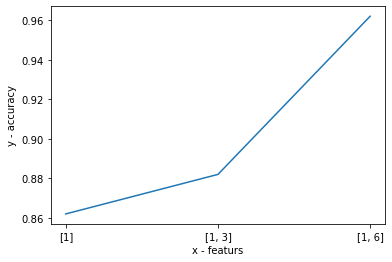

In [4]:
start = time.time()
final_features = []
best = 0.0

visited = []
graph_x = []
graph_y = []

 
if algo == 1: # forward selection
    for i in range(1, len(X[0]) + 2): # iterating over all the features
        features = [i]
        for subset in itertools.combinations(range(1, len(X[0]) + 1), i):
            features = list(subset) # adding new feature
            if set(features) in visited:
                continue
            visited.append(set(features))
            
            edf = extract_features(features, df) # extracting only features that are in features list
            predictions = knn(edf, y) # initializing the KNN model
            score = accuracy_score(y, predictions)
            print("Features: ", set(features), "Accuracy: ", round(score*100,2))
            if score > best: # if the evaluated score is greater than previous best score
                best = score # update best score 
                final_features = features
                graph_x.append(features)
                graph_y.append(score)
            else: # else remove the feature from the feature list
                features.pop()
else:
    visited = []
    features = list(range(1, len(X[0]) + 1))
    edf = extract_features(features, df) # extracting the feature
    predictions = knn(edf, y) # initializing the KNN model
    best = accuracy_score(y, predictions)
    print("Features: ", set(features), "Accuracy: ", round(best*100,2)) 
    for i in reversed(range(1, len(X[0]))): # iterating the loop in reverse order
        temp = features.copy() # copying all the values
#         print(temp)
        temp.pop((i - 1)) # eliminating the last feature
        
        if set(temp) in visited:
            continue
        visited.append(set(temp))
        edf = extract_features(temp, df) # extracting the feature
        
        predictions = knn(edf, y) # initializing the KNN model
        score = accuracy_score(y, predictions)
        print("Features: ", set(temp), "Accuracy: ", round(score*100,2))
        if score > best: # of score 
            best = score
            features = temp
            final_features = features
            graph_x.append(features)
            graph_y.append(score)

# # "CS170_Small_Data__96.txt"
# final_features
end = time.time()
graph_x = [str(x) for x in graph_x]
timetaken = str((end - start))[0:4]
print("Final Features: ", final_features)
print("Algorithm took: ", timetaken, "seconds")

print("\n\n")

import matplotlib.pyplot as plt

plt.plot(graph_x, graph_y)
plt.xlabel('x - Features')
plt.ylabel('y - Accuracy')
plt.show()